# Модель предпочтительного присоединения

В некоторую структуру (университет) последовательно, один за другим, прибывают новые
объекты (студенты). Первый прибывший создает структуру (клуб). Каждый очередной объект
с небольшой вероятностью $p$ создает новый клуб, или с вероятностью $1-p$ присоединятеся к
одному из уже имеющихся.

Вероятность присоединения к данному клубу пропорциональна его
размеру (числу членов), деленному на общее количество уже прибывших к данному моменту

Реализуем клубную систему

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class ClubSystem:
    
    def __init__(self, p = 0.1, clubs = []):
        self.p = p
        self.clubs = clubs
        self.peopleNum = 0
        self.weights = []
        if len(self.clubs) > 0:
            self.peopleNum = sum(self.clubs)
        self.weights = self.updateWeights()
        
    def step(self):
        if np.random.rand() < self.p or len(self.clubs) == 0:
            self.clubs.append(1)
        else:
            club = random.choices([m for m in range(len(self.clubs))], weights=self.weights, k = 1)[0]
            self.clubs[club] += 1
        self.peopleNum += 1
        self.updateWeights()
            
    def updateWeights(self):
        if len(self.clubs) == 0:
            self.weights = []
            return
        self.weights = [k / self.peopleNum for k in self.clubs]
        
    def log_likelihood(self, alpha):
        n = len(self.clubs)
        log_sum = np.log(np.sum(self.clubs))
        clubs = np.array(self.clubs)
        clubs = clubs[:, np.newaxis]
        power_arr = np.power(clubs, -1 * alpha)
        log_sum_pow = np.log(np.sum(power_arr, axis=0))
        return -n * log_sum_pow - alpha * log_sum
    
    def find_alpha(self):
        alpha_ax = np.linspace(0, 10)
        llh = self.log_likelihood(alpha_ax)
        opt_alpha = alpha_ax[np.argmax(llh)]
        return opt_alpha
            

Смоделируем поступление 100 студентов, зададим вероятность создания нового клуба $p=0.3$

In [3]:
people_max = 200
p = 0.3

itmo_clubs = ClubSystem(p=p)

In [4]:
for _ in range(people_max):
    itmo_clubs.step()

Text(0, 0.5, 'Число участников')

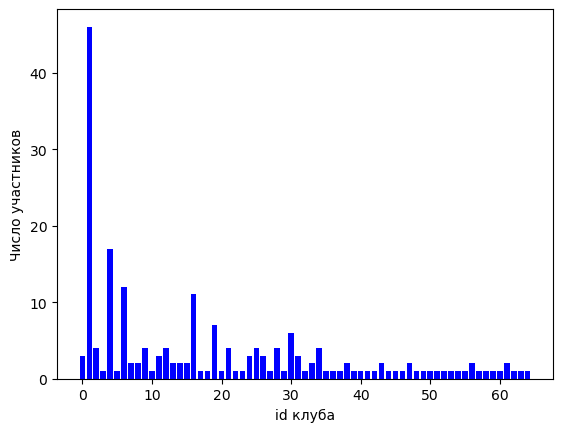

In [5]:
plt.bar((range(len(itmo_clubs.clubs))), itmo_clubs.clubs, color='blue')
plt.xlabel("id клуба")
plt.ylabel("Число участников")

Определим распределение клубов по числу участников

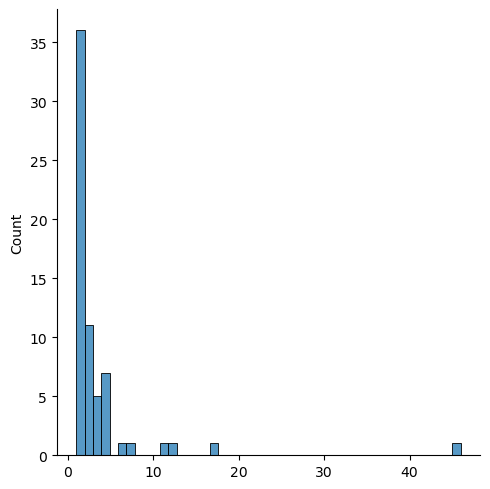

In [6]:
sns.displot(itmo_clubs.clubs)

Предположим, что получилось дискретное степенное распределение с вероятностью вида $P(x) = c x^{-\alpha}$, для нормировки $c =\left(\sum x_i^{-\alpha}\right)^{-1}$. Важно отметить, что $\alpha >1$, иначе сумма будет расходиться

Найдём $\alpha$ при помощи ММП:

$$
    \mathcal{L} = \prod\limits_{i=1}^{n}P(X_i = x_i) = c^n \prod\limits_{i=1}^{n}x_i^{-\alpha}
$$

$$
    \ln\mathcal{L} = n\ln c - \alpha \sum\limits_{i=1}^{n}\ln x_i \rightarrow \max
$$

$$
    \ln\mathcal{L} = -n\ln \sum\limits_{i=1}^{n} x_i^{-\alpha} - \alpha \sum\limits_{i=1}^{n}\ln x_i \rightarrow \max
$$

Для производной получим

$$
    \sum\limits_{i=1}^{n} \ln x_i - \dfrac{\sum\limits_{i=1}^n x_i^{-\alpha} \ln x_i}{\sum\limits_{i=1}^n x_i^{-\alpha}} = 0
$$

Построим график логарифма МП

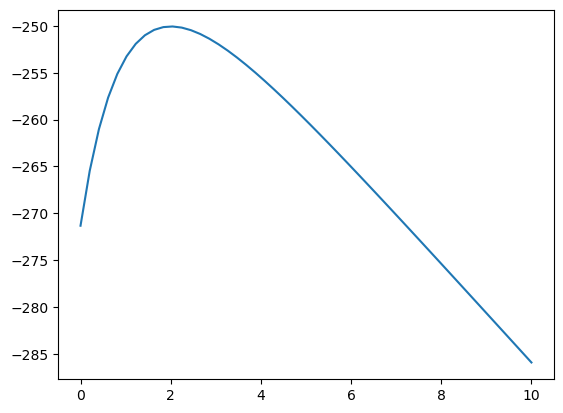

In [7]:
alpha_ax = np.linspace(0, 10)
llh = itmo_clubs.log_likelihood(alpha_ax)
plt.plot(alpha_ax, llh)

Возьём $\alpha$, при котором достигается максимум

In [8]:
opt_alpha = alpha_ax[np.argmax(llh)]
print(opt_alpha)

2.0408163265306123


Теперь попробуем найти зависимость $\alpha(p)$. Предположительно неизвестно даже близко, как будет выглядеть зависимость, для этого построим экспериментальные данные с разными значениями $p$.

In [9]:
p_vals = []
a_vals = []
# for i in range(10):
#     p = 0.1 + i / 10
#     for _ in range(10):
#         club = ClubSystem(p)
#         for k in range(people_max):
#             club.step()
#         alpha = club.find_alpha()
#         p_vals.append(p)
#         a_vals.append(alpha)
        
for _ in range(100):
    p = np.random.uniform(low = 0.1, high = 1)
    club = ClubSystem(p)
    for k in range(people_max):
        club.step()
    alpha = club.find_alpha()
    p_vals.append(p)
    a_vals.append(alpha)

(0.0, 10.0)

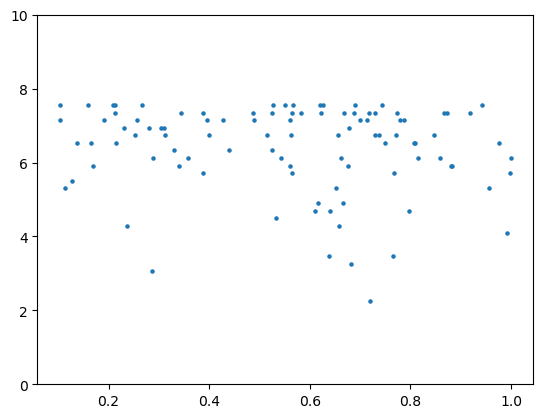

In [10]:
plt.scatter(p_vals, a_vals,s=5)
plt.ylim(0, 10)

Зависимость не наблюдается